# Project: Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we will use No-Show Appointments dataset to explore how certain factors affect wheter a patient show up at his/her appointment. We use number 1 to denote the patient did not show up and number 0 to denote the patient showed up. We will explore the following questions:  
<a href="#eda">1. Is hipertension related to not showing up?</a>  
<a href="#hand">2. Is handicapped releated to not showing up?</a>  
<a href="#age">3. Is age related to not showing up?</a>  
<a href="#genSMS">4. Is gener and SMS recieved combined related to not showing up?</a>

In [1]:
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Based on the above statistics, there are 110527 patients and 13 factors that may affect a patient's attendance. We need to drop the columns that we have no interest in and encode the No_Show column to make the investigation easier.

In [6]:
# Some Staticstics of All Patients Based on the Questions
# Calculate the difference between the number of patients with hipertension and number of patients without
hiper_diff =  df.query("Hipertension == 0").PatientId.nunique() - df.query("Hipertension == 1").PatientId.nunique()
# Calculate the difference between the number of patients who are handicapped and number of patients who are not
handi_diff = df.query("Handcap == 0").PatientId.nunique()  - df.query("Handcap == 1").PatientId.nunique()
# Calculate the differnce between number of patients in terms of gender
gender_diff = df.query("Gender == 'M'").PatientId.nunique()  - df.query("Gender == 'F'").PatientId.nunique()
# Calculate the differnce between number of male patients who received SMS and number of male patients who did not
maleSMS_diff = df.query("SMS_received == 0 & Gender == 'M'").PatientId.nunique()  - df.query("SMS_received == 1 & Gender == 'M'").PatientId.nunique()
## Calculate the differnce between number of female patients who received SMS and number of female patients who did not
femaleSMS_diff = df.query("SMS_received == 0 & Gender == 'F'").PatientId.nunique()  - df.query("SMS_received == 1 & Gender == 'F'").PatientId.nunique()
hiper_diff,handi_diff,gender_diff,maleSMS_diff,femaleSMS_diff

(37815, 60141, -17793, 8259, 11989)

In [7]:
# Add a column named "Age_Group" to the dataframe
age_bins = pd.cut(df.Age,bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0~10','10~20','20~30','30~40','40~50','50~60','60~70','70~80','80~90','90~100'])
df.insert(2,'Age_Group', age_bins)

Text(0,0.5,'Number of Patients')

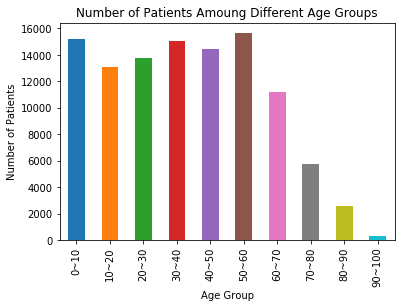

In [10]:
df["Age_Group"].value_counts(sort = False).plot(kind='bar')
plt.title("Number of Patients Amoung Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

### Data Cleaning

> 1.Drop PatientId, AppointmentID, Neighbourhood, ScheduledDay and AppointmentDay columns because they are not in the scope of this investigation.

In [11]:
df.drop(['PatientId',"AppointmentID","Neighbourhood","ScheduledDay","AppointmentDay"],axis=1, inplace=True)

> 2.Rename "No-show" column to "NoShow" for eaiser reference.

In [12]:
df.rename(columns = {'No-show':'NoShow'}, inplace = True) 

> 3.Denote absence as 1 and present as 0.

In [17]:
df['NoShow'] = df['NoShow'].map({'Yes': 1, 'No': 0})

> 4.Then, change "NoShow" column type as integer

In [18]:
df['NoShow'] = df['NoShow'].astype(int)

In [19]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis
### Is hipertension related to not showing up?

> 1.Create makes for patients who showed up and patients who did not. 

In [20]:
noshow = df.NoShow == 1
show = df.NoShow == 0

> 2.Create makes for patients who has hipertension and patients who do not.

In [21]:
HBP = df.Hipertension == 1
NHBP = df.Hipertension == 0

> 3.For patients who have hipertention, we group them by "NoShow" column. Plot the data by a pie chart with y as "Hipertension". 

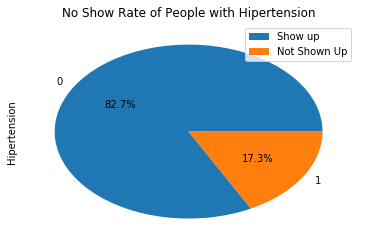

In [22]:
df[HBP].groupby(['NoShow']).count().plot(kind='pie',y='Hipertension',autopct='%1.1f%%', title="No Show Rate of People with Hipertension")
plt.legend(['Show up','Not Shown Up'])

> 4.For patients who do not have hipertention, we group them by "NoShow" column. Plot the data by a pie chart with y as "Hipertension". 

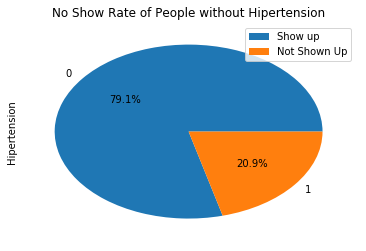

In [23]:
df[NHBP].groupby(['NoShow']).count().plot(kind='pie',y='Hipertension',autopct='%1.1f%%',title="No Show Rate of People without Hipertension")
plt.legend(['Show up','Not Shown Up'])

<a id='hand'></a>
### Is Handicap related to not showing up?

> 1.Create makes for patients who are handicapped and patients who are not.

In [24]:
Hand = df.Handcap == 1
NHand = df.Handcap == 0

> 2.For patients who are handicapped, we group them by "NoShow" column. Plot the data by a pie chart with y as "Handcap". 

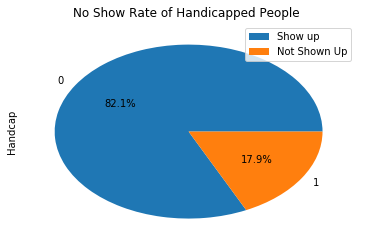

In [25]:
df[Hand].groupby(['NoShow']).count().plot(kind='pie',y='Handcap',autopct='%1.1f%%',title="No Show Rate of Handicapped People ")
plt.legend(['Show up','Not Shown Up'])

> 3.For patients who are not handicapped, we group them by "NoShow" column. Plot the data by a pie chart with y as "Handcap". 

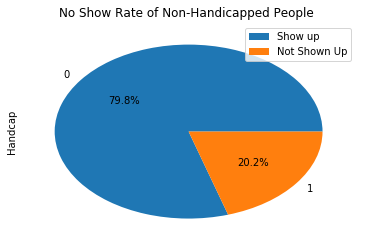

In [26]:
df[NHand].groupby(['NoShow']).count().plot(kind='pie',y='Handcap',autopct='%1.1f%%',title="No Show Rate of Non-Handicapped People ")
plt.legend(['Show up','Not Shown Up'])

<a id='age'></a>
### Is age related to not showing up?

> 1.Create 10 Bins from age 0 to age 100

In [14]:
age_bins = np.linspace(0, 100, num=11)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

> 2. Generate histogram data for patients who showed up and patients who didn't show up

In [28]:
show_hist=np.histogram(df[show].Age,bins=age_bins,range=(0,100))
No_show_hist=np.histogram(df[noshow].Age,bins=age_bins,range=(0,100))

> 3. Calcuate the show rates, which is show rate / (number of patients shown + number of patients not shown)

In [29]:
no_show_rates=No_show_hist[0]/(show_hist[0]+No_show_hist[0])

> 4. Plot the graph

Text(0.5,1,'No Show Rate among Different Ages')

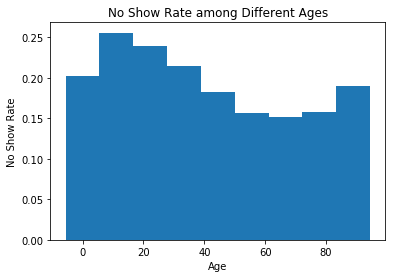

In [30]:
plt.bar(age_bins[:-1],no_show_rates,width=age_bins[1]-age_bins[0])
plt.xlabel('Age')
plt.ylabel('No Show Rate')
plt.title("No Show Rate among Different Ages")

<a id='genSMS'></a>
### Is gender and SMS received combined related to not showing up?

Text(0,0.5,'No Show Rate')

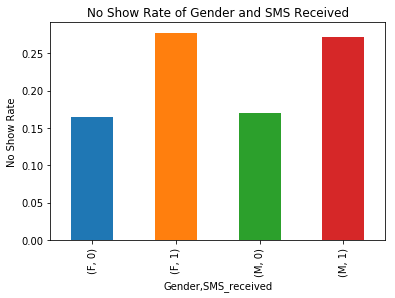

In [31]:
df.groupby(['Gender','SMS_received']).NoShow.mean().plot(kind="bar",title="No Show Rate of Gender and SMS Received")
plt.ylabel('No Show Rate')

<a id='conclusions'></a>
## Conclusions

> Here are the findings regarding the questions:  
> ***Is hipertension related to not showing up***  
> For people who have hipertension, 17.3% of them do not show up. For people who do not have hipertension, 20.9% of them do not show up. Patients are less likely to show up in an appointment if they do have hipertension.  
> ***Is handicap related to not showing up***  
> For people who are handicapped, 17.9% of them do not show up.For people who are not handicapped, 20.2% of them do not show up. Patients are less likely to show up in an appointment if they are not handicapped.  
> ***Is age related to not showing up?***  
> Patients, who are between 10 and 70 years old, have higher no show rates when they are young and the rate decreases as they get older.  
> ***Is gender and SMS received combined related to not showing up?***  
Gender does not play an important role in determine if a patient would show up. If a patient receives a SMS, he/she is more likely not shown.

### Limitations
> Theare are 37815 more patients who do not have hipertension than patients who do.  
> Theare are 60141 more patients who are not handicapped than patients who are.  
> Females are 17793 more than males.  
> The number of patients in each age group is not evenly distributed.  
> There are 8259 more male patients who did not receive SMS than male patients who did.  
> There are 11989 more female patiens who did not receive SMS than female patients who did  
> The data is unbalanced in above aspects. This may lead to inaccurate conclusions.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255